<a href="https://colab.research.google.com/github/sivapriya-yuga/sivapriya-yuga/blob/main/Simple_linear_regression_practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [ ]:
from google .colab import files
df=files.upload()
df

Saving data.csv to data.csv


{'data.csv': b'Height,Weight\r\n1.47,52.21\r\n1.5,53.12\r\n1.52,54.48\r\n1.55,55.84\r\n1.57,57.2\r\n1.6,58.57\r\n1.63,59.93\r\n1.65,61.29\r\n1.68,63.11\r\n1.7,64.47\r\n1.73,66.28\r\n1.75,68.1\r\n1.78,69.92\r\n1.8,72.19\r\n1.83,74.46\r\n'}

In [ ]:
df_data=pd.read_csv("data.csv")
df_data

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  15 non-null     float64
 1   Weight  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [ ]:
df_data.shape

(15, 2)

In [ ]:
df_data.columns


Index(['Height', 'Weight'], dtype='object')

In [ ]:
df_data.describe()

,Height,Weight
count,15.000000,15.000000
mean,1.650667,62.078000
std,0.114235,7.037515
min,1.470000,52.210000
25%,1.560000,56.520000
50%,1.650000,61.290000
75%,1.740000,67.190000
max,1.830000,74.460000


In [ ]:
df_data.isnull().sum()

Height    0
Weight    0
dtype: int64

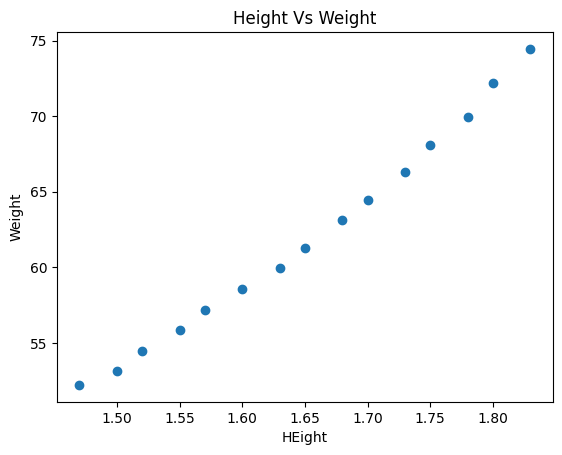

In [ ]:
plt.scatter(x="Height",y="Weight",data=df_data)
plt.title("Height Vs Weight")
plt.xlabel("HEight")
plt.ylabel("Weight")
plt.show()

taking x(independent variable)

In [ ]:
x=df_data.iloc[:,0]
x

0     1.47
1     1.50
2     1.52
3     1.55
4     1.57
5     1.60
6     1.63
7     1.65
8     1.68
9     1.70
10    1.73
11    1.75
12    1.78
13    1.80
14    1.83
Name: Height, dtype: float64

taking y (Dependent variable)

In [ ]:
y=df_data.iloc[:,1]
y

0     52.21
1     53.12
2     54.48
3     55.84
4     57.20
5     58.57
6     59.93
7     61.29
8     63.11
9     64.47
10    66.28
11    68.10
12    69.92
13    72.19
14    74.46
Name: Weight, dtype: float64

In [ ]:
#TRain test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=21)

In [ ]:
x_train

1     1.50
2     1.52
12    1.78
3     1.55
13    1.80
11    1.75
0     1.47
4     1.57
8     1.68
9     1.70
Name: Height, dtype: float64

In [ ]:
y_test

14    74.46
5     58.57
7     61.29
10    66.28
6     59.93
Name: Weight, dtype: float64

In [ ]:
y_train

1     53.12
2     54.48
12    69.92
3     55.84
13    72.19
11    68.10
0     52.21
4     57.20
8     63.11
9     64.47
Name: Weight, dtype: float64

In [ ]:
y_test

14    74.46
5     58.57
7     61.29
10    66.28
6     59.93
Name: Weight, dtype: float64

In [ ]:
print(y_train.shape)

(10,)


In [ ]:
print(x_train.shape)

(10,)


In [ ]:

from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
x_train= x_train.to_numpy().reshape(-1,1)
y_train=y_train.to_numpy().reshape(-1,1)
linreg.fit(x_train,y_train)

LinearRegression()

In [ ]:
#To find intercept
print(linreg.fit(x_train,y_train))

LinearRegression()


In [ ]:
print(linreg.intercept_)

[-36.41317073]


In [ ]:
print(linreg.coef_)

[[59.72865854]]


In [ ]:
x_test=np.array(x_test).reshape(-1,1)
y_predict=linreg.predict(x_test)
y_predict

array([[72.89027439],
       [59.15268293],
       [62.13911585],
       [66.91740854],
       [60.94454268]])

In [ ]:
y_test

14    74.46
5     58.57
7     61.29
10    66.28
6     59.93
Name: Weight, dtype: float64

In [ ]:
y_test=np.array(y_test).reshape(-1,1)
err=y_test-y_predict
err

array([[ 1.56972561],
       [-0.58268293],
       [-0.84911585],
       [-0.63740854],
       [-1.01454268]])

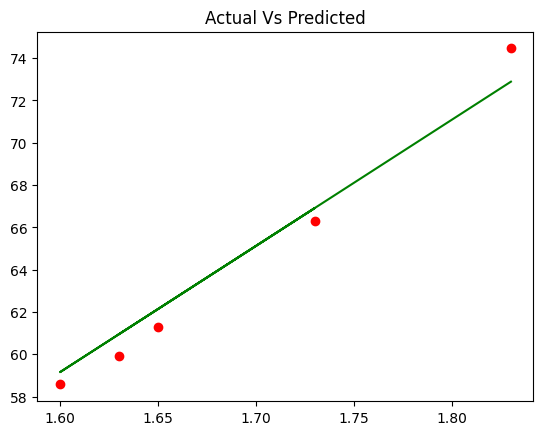

In [ ]:
plt.scatter(x_test,y_test,color="red")
plt.plot(x_test,y_predict,color="green")
plt.title("Actual Vs Predicted")
plt.show()

Evaluation metrics


In [ ]:
from sklearn import metrics
print("MEAN ABSOLUTE ERROR MAE",metrics.mean_absolute_error(y_test,y_predict))
print("MEAN SQUARED ERROR MSE",metrics.mean_squared_error(y_test,y_predict))
print("ROOT MEAN SQUARED ERROR \n")
print(np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

MEAN ABSOLUTE ERROR MAE 0.9306951219512143
MEAN SQUARED ERROR MSE 0.9920284228137952
ROOT MEAN SQUARED ERROR 

0.9960062363327828


In [ ]:
print("R2 score",metrics.r2_score(y_test,y_predict))

R2 score 0.9704661539074839


**Practise sheet with New dataset Salary of Employees**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
from google .colab import files
df=files.upload()

Saving Salary_dataset.csv to Salary_dataset.csv


In [3]:
df_sal=pd.read_csv("Salary_dataset.csv")
df_sal

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344
1,1,1.4,46206
2,2,1.6,37732
3,3,2.1,43526
4,4,2.3,39892
5,5,3.0,56643
6,6,3.1,60151
7,7,3.3,54446
8,8,3.3,64446
9,9,3.8,57190


In [5]:
df_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 848.0 bytes


In [6]:
df_sal.shape

(30, 3)

In [7]:
df_sal.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

In [10]:
df_sal.dropna(axis=1)
df_sal

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344
1,1,1.4,46206
2,2,1.6,37732
3,3,2.1,43526
4,4,2.3,39892
5,5,3.0,56643
6,6,3.1,60151
7,7,3.3,54446
8,8,3.3,64446
9,9,3.8,57190


In [11]:
df_sal.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [12]:
df_sal.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


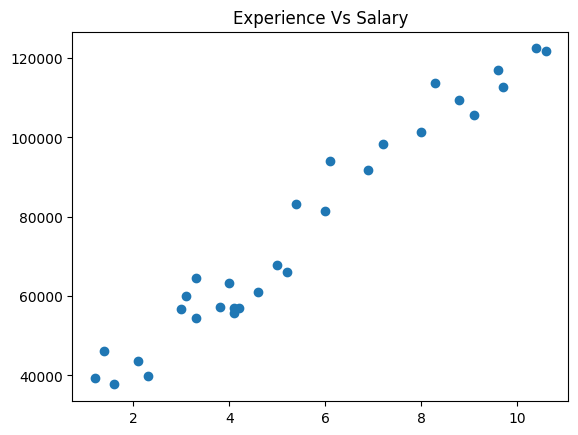

In [19]:
plt.scatter(x="YearsExperience",y="Salary",data=df_sal)
plt.title("Experience Vs Salary")
plt.show()

# splitting the data into train and test **data**

In [15]:
x=df_sal.iloc[:,1:2]
x

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3
5,3.0
6,3.1
7,3.3
8,3.3
9,3.8


In [17]:
y=df_sal.iloc[:,2:3]
y

,Salary
0,39344
1,46206
2,37732
3,43526
4,39892
5,56643
6,60151
7,54446
8,64446
9,57190


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)


In [21]:
x_train

,YearsExperience
0,1.2
4,2.3
16,5.2
5,3.0
13,4.2
11,4.1
22,8.0
1,1.4
2,1.6
25,9.1


In [22]:
x_test

,YearsExperience
27,9.7
15,5.0
23,8.3
17,5.4
8,3.3
9,3.8
28,10.4
24,8.8
12,4.1


In [23]:
y_train

,Salary
0,39344
4,39892
16,66030
5,56643
13,57082
11,55795
22,101303
1,46206
2,37732
25,105583


In [24]:
y_test

,Salary
27,112636
15,67939
23,113813
17,83089
8,64446
9,57190
28,122392
24,109432
12,56958


Fitting the model\

In [25]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [26]:
print(lr.intercept_)

[24985.53016251]


In [27]:
print(lr.coef_)

[[9339.08172382]]


In [28]:
y_train_predict=lr.predict(x_train)
y_train_predict

array([[ 36192.42823109],
       [ 46465.41812729],
       [ 73548.75512635],
       [ 53002.77533396],
       [ 64209.67340254],
       [ 63275.76523015],
       [ 99698.18395303],
       [ 38060.24457585],
       [ 39928.06092062],
       [109971.17384923],
       [ 44597.60178252],
       [ 92226.91857398],
       [114640.71471114],
       [ 81020.0205054 ],
       [123979.79643495],
       [ 89425.19405684],
       [ 55804.4998511 ],
       [ 62341.85705777],
       [ 67945.30609206],
       [ 81953.92867778],
       [ 53936.68350634]])

In [29]:
y_test_predict=lr.predict(x_test)
y_test_predict

array([[115574.62288352],
       [ 71680.93878159],
       [102499.90847018],
       [ 75416.57147111],
       [ 55804.4998511 ],
       [ 60474.04071301],
       [122111.98009019],
       [107169.44933209],
       [ 63275.76523015]])

In [30]:
err=y_test-y_test_predict
err

,Salary
27,-2938.622884
15,-3741.938782
23,11313.091530
17,7672.428529
8,8641.500149
9,-3284.040713
28,280.019910
24,2262.550668
12,-6317.765230


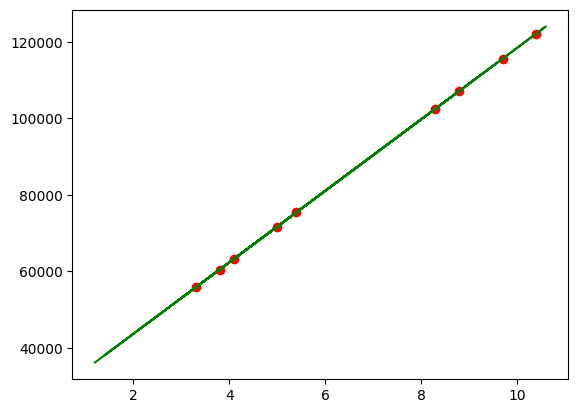

In [35]:
import matplotlib.pyplot as plt

plt.scatter(x_test,y_test_predict, color="red")
plt.plot(x_train, y_train_predict, color="green")
plt.show()

## **Determining the Metrics for Linear Regression\**

In [36]:
from sklearn import metrics
print("Mean Absolute error MAE",metrics.mean_absolute_error(y_test,y_test_predict))
print("Mean Squared Error MSE",metrics.mean_squared_error(y_test,y_test_predict))
print("Root Mean Squared Error RMSE \n")
print(np.sqrt(metrics.mean_squared_error(y_test,y_test_predict)))

Mean Absolute error MAE 5161.328710400173
Mean Squared Error MSE 37784662.466212995
Root Mean Squared Error RMSE 

6146.923007994568


In [37]:
print("R2score",metrics.r2_score(y_test,y_test_predict))


R2score 0.9414466227178216
